In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [25]:
classifier_df = pd.read_csv('../mobile-tensorflow-pruning-data/Classify-original-2018-06-06.csv')
style_df = pd.read_csv('../mobile-tensorflow-pruning-data/Stylize-original-2018-06-06.csv')

In [26]:
from datetime import time
import re

In [27]:
for n, t in enumerate(classifier_df["Time"]):
    hour, minute, sec, mill = map(int, re.split("[: ]", t))
    t_0 = time(hour, minute, sec, mill)
    classifier_df["Time"][n] = t_0

for n, t in enumerate(style_df["Time"]):
    hour, minute, sec, mill = map(int, re.split("[: ]", t))
    t_0 = time(hour, minute, sec, mill)
    style_df["Time"][n] = t_0     

/Users/codyblakeney/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/codyblakeney/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [5]:
def classifier_delta(t):
    t_0 = classifier_df["Time"][0]
    t_0_ms = (t_0.hour*60*60 + t_0.minute*60 + t_0.second)*1000 + t_0.microsecond
    t_ms = (t.hour*60*60 + t.minute*60 + t.second)*1000 + t.microsecond
    return t_ms - t_0_ms

def style_delta(t):
    t_0 = style_df["Time"][0]
    t_0_ms = (t_0.hour*60*60 + t_0.minute*60 + t_0.second)*1000 + t_0.microsecond
    t_ms = (t.hour*60*60 + t.minute*60 + t.second)*1000 + t.microsecond
    return t_ms - t_0_ms

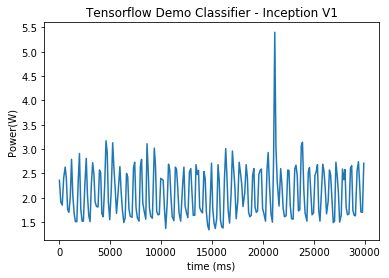

In [6]:
plt.plot(list(map(classifier_delta, classifier_df["Time"])) , list(map(lambda x: x*-1, classifier_df["Power(W)"])) )
plt.xlabel("time (ms)")
plt.ylabel("Power(W)")
plt.title("Tensorflow Demo Classifier - Inception V1")
plt.show()

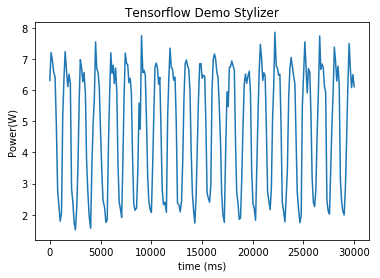

In [7]:
plt.plot(list(map(style_delta, style_df["Time"])) , list(map(lambda x: x*-1, style_df["Power(W)"])) )
plt.xlabel("time (ms)")
plt.ylabel("Power(W)")
plt.title("Tensorflow Demo Stylizer")
plt.show()

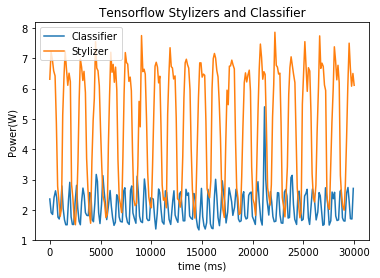

In [8]:
plt.plot(list(map(classifier_delta, classifier_df["Time"])) , list(map(lambda x: x*-1, classifier_df["Power(W)"])) , label="Classifier")
plt.plot(list(map(style_delta, style_df["Time"])) , list(map(lambda x: x*-1, style_df["Power(W)"])), label="Stylizer" )
plt.xlabel("time (ms)")
plt.ylabel("Power(W)")
plt.title("Tensorflow Stylizers and Classifier")
plt.legend(loc='upper left')
plt.show()

In [9]:
classifier_df.keys()

Index(['Time', 'MemOccupy %Free', 'CpuTotalUsage(%)', 'Little CPU Freq(Hz)',
       'Big CPU Freq(Hz)', 'GPU Utilization(%)', 'GPUBandwidth(MB/s)',
       'Current(mA)', 'Temperature(C)', 'Volatge(V)', 'Power(W)', 'cpu0 util',
       'cpu1 util', 'cpu2 util', 'cpu3 util', 'LITTLE util', 'cpu4 util',
       'cpu5 util', 'cpu6 util', 'cpu7 util', 'Big util'],
      dtype='object')

In [10]:
cpu_reg = re.compile("cpu[0-9] util")

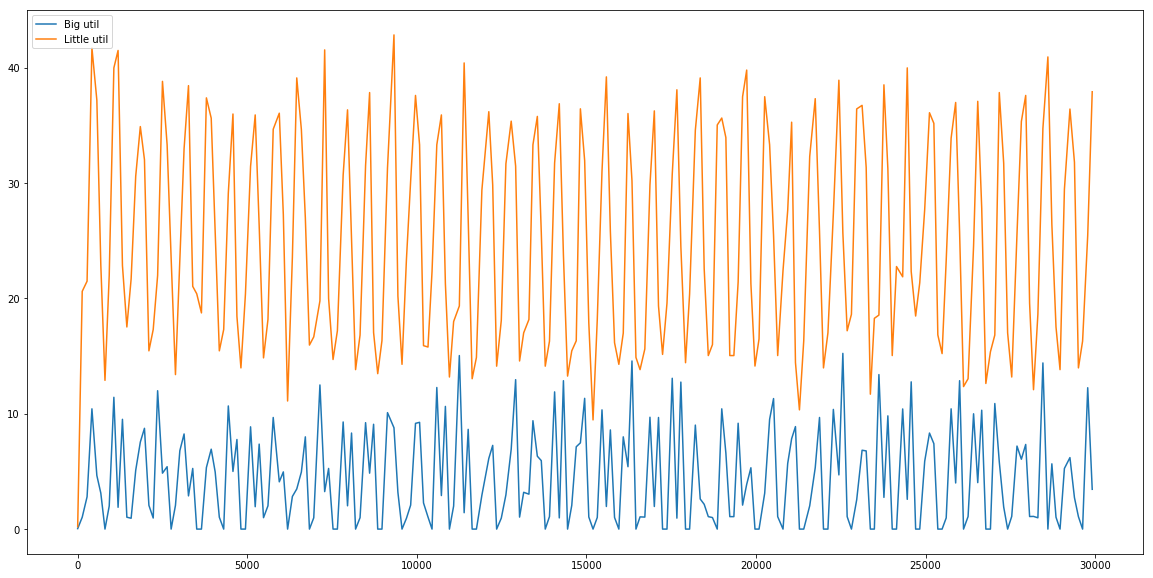

In [16]:
plt.figure(figsize=(20,10))
plt.plot(list(map(classifier_delta, classifier_df["Time"])) , list(map(lambda x: x, classifier_df["Big util"])) , label="Big util")
plt.plot(list(map(classifier_delta, classifier_df["Time"])) , list(map(lambda x: x, classifier_df["LITTLE util"])) , label="Little util")
    
plt.legend(loc='upper left')

plt.show()

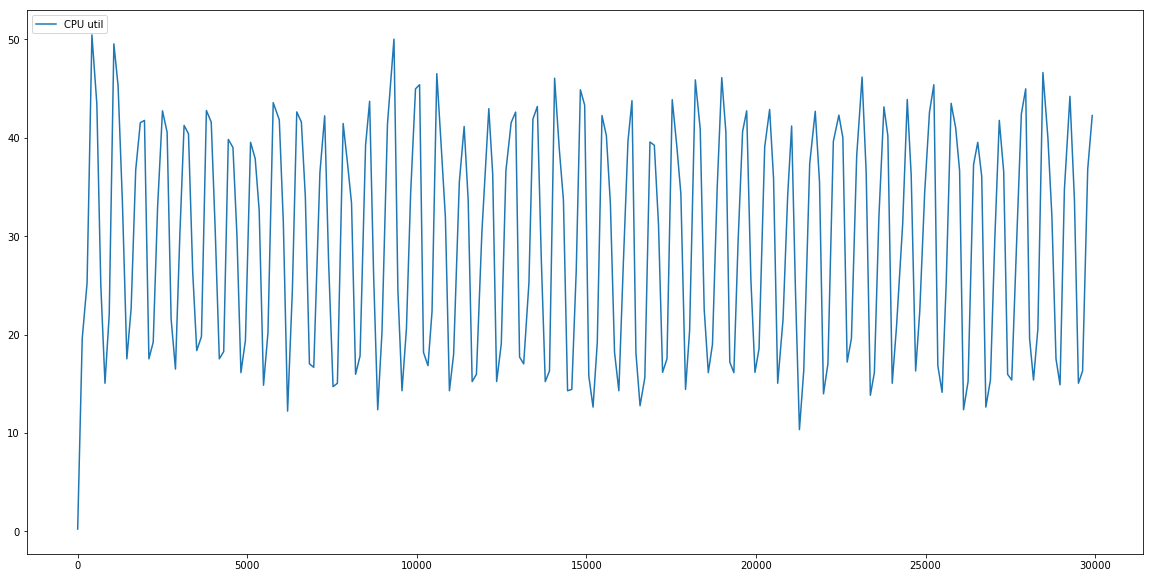

In [19]:
plt.figure(figsize=(20,10))
plt.plot(list(map(classifier_delta, classifier_df["Time"])) , list(map(lambda x: x, classifier_df["CpuTotalUsage(%)"])) , label="CPU util")

    
plt.legend(loc='upper left')

plt.show()

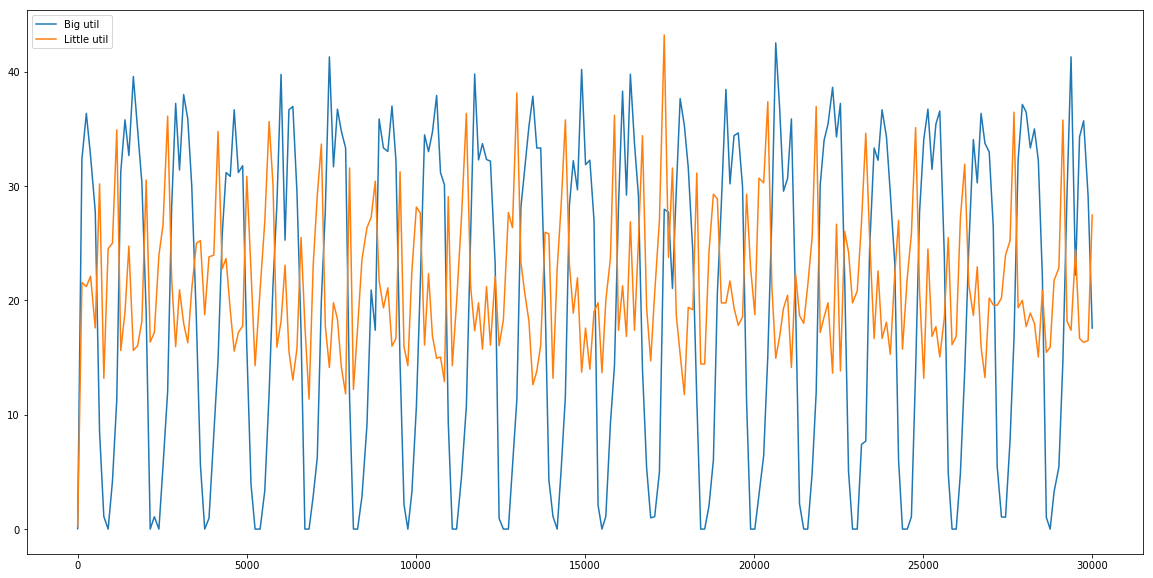

In [22]:
plt.figure(figsize=(20,10))
plt.plot(list(map(style_delta, style_df["Time"])) , list(map(lambda x: x, style_df["Big util"])) , label="Big util")
plt.plot(list(map(style_delta, style_df["Time"])) , list(map(lambda x: x, style_df["LITTLE util"])) , label="Little util")
    
plt.legend(loc='upper left')

plt.show()

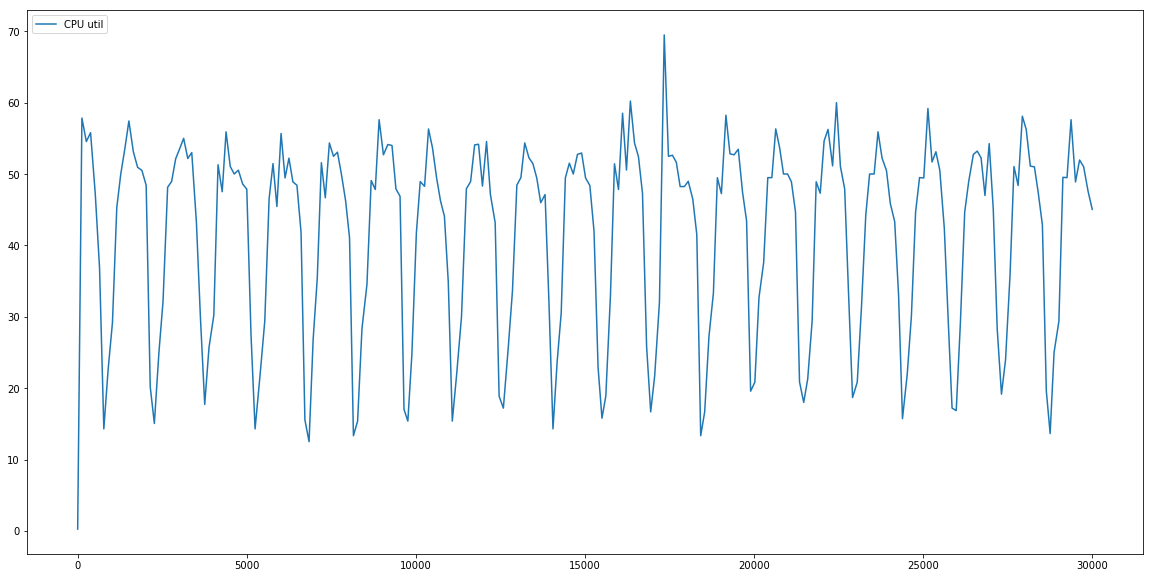

In [23]:
plt.figure(figsize=(20,10))
plt.plot(list(map(style_delta, style_df["Time"])) , list(map(lambda x: x, style_df["CpuTotalUsage(%)"])) , label="CPU util")

    
plt.legend(loc='upper left')

plt.show()